# ALZHEIMER EARLY DETECTION
## 1. INTRODUCTION AND STATE OF THE ART

Alzheimer's disease (AD) is a progressive neurologic disorder which causes the brain to atrophy and brain cells to die. This disease is the main common cause (around 60-70%) of dementia, which leads to a continuous decline in thinking and behavioral, making the person to lose their own autonomy.

The cause of AD is still poorly understood, there are many genetic and environmental risk factors associated with the disease, i.e. clinical depression, high blood pressure or head injury. In terms of genetic causes, the strongest genetic risk is from an allele of APOE. 

AD is usually diagnosed based on the patient's medical history, history from relatives and behavorital observations. But also techniques as computed tomography (CT), magnetic resonance imaging (MRI), single-photon emission computed tomography (SPECT) or positron emission tomography (PET) can help to diagnose this disease and exclude other cerebral pathology.

The Open Access Series of Imaging Studies (OASIS) is a project which creates neuroimaging datasets of the brain freely available to the scientific community. The main aim of this project is to help scientists to keep discovering new things in basic and clinical neuroscience. That is why we are going to use one of their datasets for the aim of this thesis, which is to predict the Clinical Dementia Rating (CDR) of a patient, based on machine learning algorithms. 


## 2. DATA SET AND ITS UNDERSTANDING

### SUMMARY

As it was said, OASIS project generated some MRI data sets related to AD. For this project, a longitudinal sample of MRI data from older adults with and without AD is picked. This dataset gathers data from 150 individuals age 60 to 96 years, where each of them was scanned on two or more visits. From the data colletted we have:

* 64 patients had very mild to moderate AD at their initial visit. This assesment was done using the Clinical Dementia Rating (CDR).
* 14 patients were evaluated as "Nondemented" at their initial visit and after diagnosed with AD in a subsequent scan.
* 72 patients were evaluated as "Nondemented" throughout each MRI session.
* Everyone is right-handed.
* From the 150 subjects, 62 are men and 88 are women.
* All data were acquired on the same scanner using identical procedures.

### COLUMN DESCRIPTION

|COL |Description|
|:-----|:----|
|EDUC |Years of Education |
|SES |Socioeconomic Status |
|MMSE |Mini Mental State Examination |
|CDR |Clinical Dementia Rating |
|eTIV |Estimated Total Intracranial Volume (cm3) |
|nWBV |Normalize Whole Brain Volume |
|ASF |Atlas Scaling Factor |

#### SES: Socioeconomic Status
Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status).

#### MMSE: Mini Mental State Examination
Mini-Mental State Examination score (range is from 0 = worst to 30 = best).

#### CDR: Clinical Dementia Rating
Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)

#### ASF: Atlas Scaling Factor
Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

#### nWBV: Normalized Whole-Brain Volume 
Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process.

## 3. EXPLORATORY DATA ANALYSIS


Once we have a general picture of the data set, we are going to explore our data. Our main goal is to find out how the CDR, and thus, the diagnosis of the patient, is related to the other variables. It is really important to get some visual information, check the correlation between our variables, and, in short, understand the nature of our data in order to choose the right variables to predict our target. 

In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the dataset
df = pd.read_csv('C:/Users/rrolr/OneDrive/Documentos/Máster/TFM/oasis_longitudinal.csv')
#First look to the dataset
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
#Drop useless columns
df = df.drop(['MRI ID', 'Hand', 'Visit', 'Subject ID'], axis=1)

In order to plot the distribution of Non-Demented/Demented people in men and women, we apply some changes to the column Group (Demented=1 and Non-Demented=0) and M/F (Men=0 and Women=1).

In [5]:
#Replacement Coverted column to Demented
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
#Assign Demented to 1 and Non Demented to 0
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])
#Assign M to 0 and F to 1
df['M/F'] = df['M/F'].replace(['M','F'], [0,1])

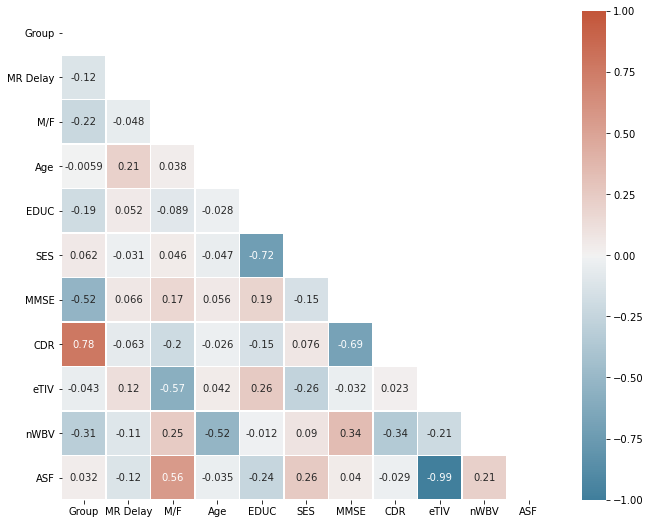

In [6]:
#Get Correlation Matrix 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": 1})

We can observe in the correlation matrix how the CDR and the Group are highly correlated, as well as eTIV and ASF, for obvious reasons. Apart from that, it is noteworthy to see how the MMSE has a big influence in the CDR. The higher the MMSE is, the less developed is the dementia in the subject. 

The Normalized Whole-Brain Volume (nWBV) and the gender (M/F) are less but also correlated to the CDR. Higher dementia ratings are associated to smaller brain volumes, and it seems that men are more likely to suffer of AD.

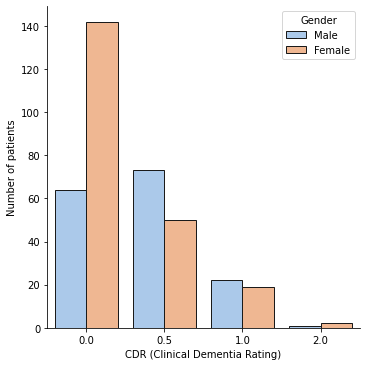

In [7]:
#Plot CDR and Gender
gender_plot = sns.catplot(x="CDR", hue="M/F", kind="count", data=df, palette="pastel", edgecolor="0.1", legend=False)
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
gender_plot.set(xlabel='CDR (Clinical Dementia Rating)', ylabel='Number of patients')
plt.show(gender_plot)

Effectively, it looks like women are less likely to have Alzheimer than men.

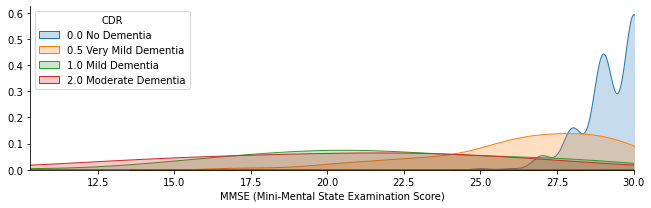

In [8]:
#Plot MMSE and CDR
MMSE_plot = sns.FacetGrid(df,hue="CDR", aspect=3)
MMSE_plot.map(sns.kdeplot,'MMSE',shade = True)
MMSE_plot.set(xlim=(0, df['MMSE'].max()))
plt.xlim(10.30)
MMSE_plot.set(xlabel='MMSE (Mini-Mental State Examination Score)')
plt.legend(title='CDR', loc='upper left', labels=['0.0 No Dementia', '0.5 Very Mild Dementia', '1.0 Mild Dementia', '2.0 Moderate Dementia'])

All subjects with no dementia, had a higher MMSE than patients with some kind of dementia. 

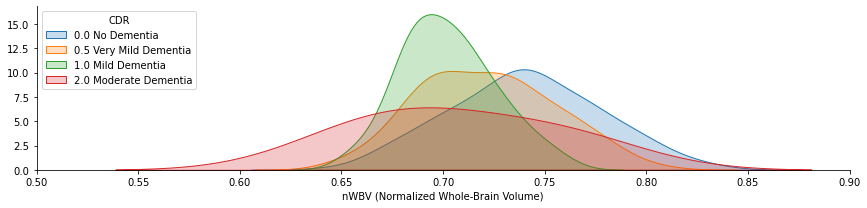

In [9]:
#Plot nWBV and CDR
nWBV_plot = sns.FacetGrid(df,hue="CDR", aspect=4)
nWBV_plot.map(sns.kdeplot,'nWBV',shade = True)
nWBV_plot.set(xlim=(0, df['nWBV'].max()))
plt.xlim(0.5,0.9)
nWBV_plot.set(xlabel='nWBV (Normalized Whole-Brain Volume)')
plt.legend(title='CDR', loc='upper left', labels=['0.0 No Dementia', '0.5 Very Mild Dementia', '1.0 Mild Dementia', '2.0 Moderate Dementia'])

We see in this graph how the curve of no demented subjetcs are moved to the right, where the brain volume is bigger. Moreover, we observe how there are many cases with mild dementia located to the left of the plot with a smaller brain volume.

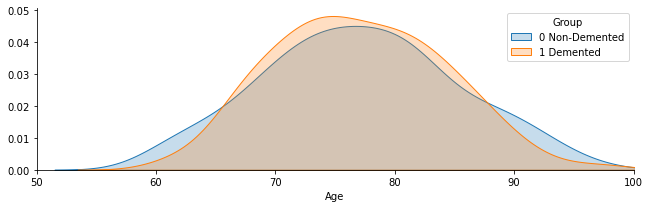

In [10]:
#Plot Age and Group
age_plot = sns.FacetGrid(df,hue="Group", aspect=3)
age_plot.map(sns.kdeplot,'Age',shade = True)
age_plot.set(xlim=(0, df['Age'].max()))
plt.xlim(50,100)
plt.legend(title='Group', loc='upper right', labels=['0 Non-Demented', '1 Demented'])

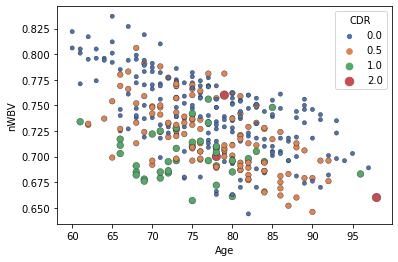

In [11]:
#Plot Age, nWBV and CDR
sns.scatterplot(data=df, x="Age", y="nWBV", hue='CDR', palette="deep", size='CDR', legend='full', edgecolor="0.1")

A really interesting scatter plot here. Most of the cases of no dementia, are located higher than the cases with CDR=0.5, 1.0 and 2.0, which means bigger brain volume. Also we can observe a descending tendency of the brain volumen with age.

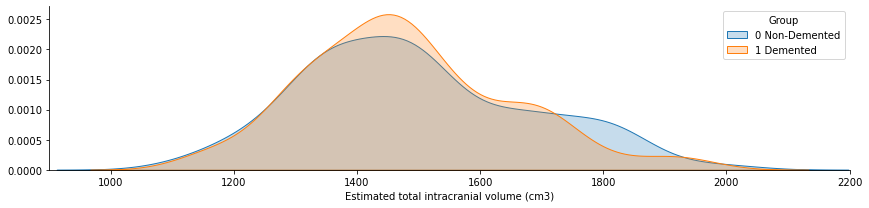

In [30]:
#Plot eTIV and Group
eTIV_plot = sns.FacetGrid(df, hue="Group", aspect=4)
eTIV_plot.map(sns.kdeplot,'eTIV',shade = True)
eTIV_plot.set(xlim=(0, df['eTIV'].max()))
plt.xlim(900,2200)
plt.legend(title='Group', loc='upper right', labels=['0 Non-Demented', '1 Demented'])
eTIV_plot.set(xlabel='Estimated total intracranial volume (cm3)')


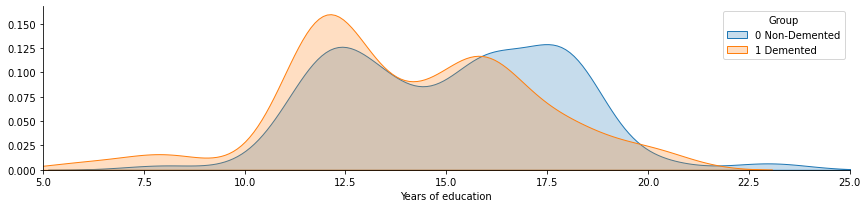

In [36]:
#Plot eTIV and Group
EDUC_plot = sns.FacetGrid(df, hue="Group", aspect=4)
EDUC_plot.map(sns.kdeplot,'EDUC',shade = True)
EDUC_plot.set(xlim=(0, df['EDUC'].max()))
plt.xlim(5,25)
plt.legend(title='Group', loc='upper right', labels=['0 Non-Demented', '1 Demented'])
EDUC_plot.set(xlabel='Years of education')


From all these plots we can deduce some conclusions:
* Women are more likely to have AD than men.
* The Mini-Mental State Examination Score (MMSE) has an evident impact on the dementia detection. Lower it is, more likely to have it.
* The older the subject is, smaller brain volume they have, and also more chance to be diagnosed with dementia.
* Education can also have an impact on the diagnosis. People who has trained and exercise their brain for longer, can reduce the chance oh having AD.

## 3. DATA PREPROCESSING

Before we start to build our machine learning models, it is important to perform a preprocessing in our data set. Firstly, we are goint to check if there are any missing values.

In [13]:
#Check how many missing values are in the dataset
pd.isnull(df).sum()

Group        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

There are 19 missing values in the SES column and 2 missing values in the MMSE column. We decided to replace these missing values with the median. In the case of the SES column, we grouped the EDUC Colum and calculated the median for each group. We performed in the same way with the MMSE, since it seems CDR and MMSE are highly correlated.

In [14]:
#Group the median of SES (Socioconomic status) by level of education (EDUC)
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [15]:
#Group the median of MMSE (Mini-Mental State Examination score) by CDR
df.groupby(['CDR'])['MMSE'].median()

CDR
0.0    29.0
0.5    27.0
1.0    21.0
2.0    21.0
Name: MMSE, dtype: float64

In [16]:
#Fill missing values with median 
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)
df["MMSE"].fillna(df.groupby("CDR")["MMSE"].transform("median"), inplace=True)

In [17]:
#Check there are no missing values
pd.isnull(df).sum()

Group       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [18]:
#Transform CDR column to string type
df['CDR'] = df['CDR'].astype('str')

#Import libraries for preprocessing and splitting the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



In [19]:
#CDR will be the target variable
df_target = df['CDR'].values

#Define features
df_data =  df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']].values

#Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(df_data, df_target, random_state=0)

#Scale the dataset
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train)/std_on_train
X_test_scaled = (X_test - mean_on_train)/std_on_train

Validation accuracy with best parameter is 0.7240143369175627
Best Test accuracy is 0.7659574468085106
Best max depth is 2
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        53
         0.5       0.65      0.46      0.54        28
         1.0       0.83      0.77      0.80        13

    accuracy                           0.77        94
   macro avg       0.76      0.72      0.73        94
weighted avg       0.75      0.77      0.75        94



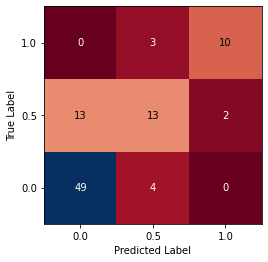

In [20]:
#Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import mglearn 
from sklearn.metrics import classification_report

#Create empty list for appending accuracy results
results = []

#Initialize best_score variable
best_score = 0

#Number of kfolds for the cross-validation
kfolds=3

#Decision Tree algorithm where different maxdepth values are tested
for maxdepth in range(1,10):
    
        tree = DecisionTreeClassifier(max_depth=maxdepth, random_state=34)
        scores = cross_val_score(tree, X_train, Y_train, cv=kfolds, scoring='accuracy')
        score = np.mean(scores)
        SelectedDTModel = DecisionTreeClassifier(max_depth=maxdepth).fit(X_train, Y_train)  
        test_score = SelectedDTModel.score(X_test, Y_test)
        
        #Check if the test score is better than current best score and variables update
        if test_score > best_score:
            best_score = test_score
            best_parameter = maxdepth
            best_valid = score
            PredictedOutput = SelectedDTModel.predict(X_test)
            SelectedDTModel_best = DecisionTreeClassifier(max_depth=best_parameter).fit(X_train, Y_train)  
            
print("Validation accuracy with best parameter is", best_valid)
print("Best Test accuracy is", best_score)
print("Best max depth is", best_parameter)

#Create and plot the confusion matrix
scores_images = mglearn.tools.heatmap(confusion_matrix(Y_test, PredictedOutput), xlabel="Predicted Label",
                                      ylabel="True Label", xticklabels=["0.0", "0.5", "1.0"], 
                                       yticklabels=["0.0", "0.5", "1.0"], cmap="RdBu", fmt="%d")

#Print of results report
print(classification_report(Y_test, PredictedOutput))

#Append the results to the list
model = 'Decision Tree'
results.append([model, best_valid, best_score])

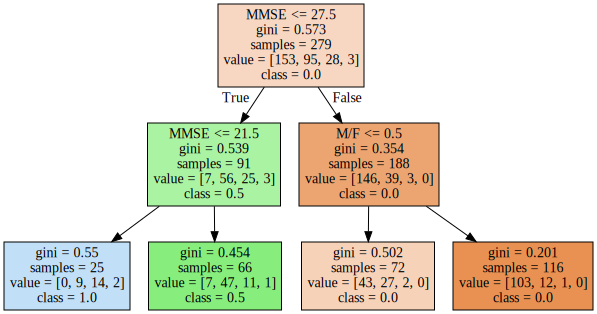

In [21]:
#Import necessary libraries for plotting the decision tree
from sklearn.tree import export_graphviz
import graphviz

#Generate and save decision tree plot
export_graphviz(SelectedDTModel_best, out_file="tree.dot", class_names=["0.0", "0.5", "1.0", "2.0"], feature_names=('M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'), filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()

#Display the decision tree
display(graphviz.Source(dot_graph))

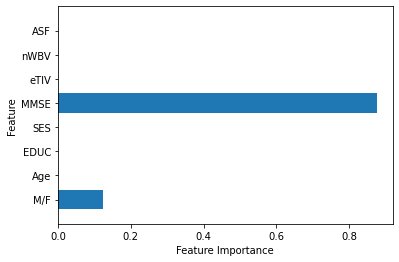

In [22]:
#Function that plots the importance of each feature for the algorithm
def plot_feature_importances(model):
    n_features = df_data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ('M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'))
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(SelectedDTModel_best)

Validation accuracy with best parameter is 0.7240143369175627
Best Test accuracy is 0.7978723404255319
Best max depth is 6
Best number of trees is 10
Best number of estimators is 6
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        53
         0.5       0.66      0.68      0.67        28
         1.0       0.82      0.69      0.75        13

    accuracy                           0.80        94
   macro avg       0.78      0.75      0.77        94
weighted avg       0.80      0.80      0.80        94



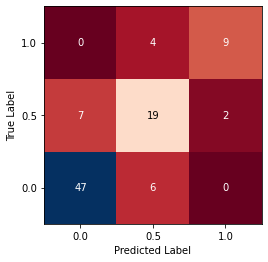

In [23]:
#Import necessary library
from sklearn.ensemble import RandomForestClassifier

#Initialize best_score variable
best_score = 0 

#Number of kfolds for the cross-validation
kfolds=3

#Random Forest algorithm where different maxdepth, features and trees values are tested
for trees in range(1,20):
    for features in range(1,9):
        for maxdepth in range(1,9):
    
            tree = RandomForestClassifier(max_depth=maxdepth, n_estimators = trees, max_features = features, random_state=34)
            scores = cross_val_score(tree, X_train, Y_train, cv=kfolds, scoring='accuracy')
            score = np.mean(scores)
            SelectedRFModel = RandomForestClassifier(max_depth=maxdepth, n_estimators = trees, max_features = features).fit(X_train, Y_train)  
            test_score = SelectedRFModel.score(X_test, Y_test)
            
            #Check if the test score is better than current best score and variables update
            if test_score > best_score:
                best_score = test_score
                best_depth = maxdepth
                best_trees = trees
                best_features = features
                best_valid = score
                PredictedOutputRF = SelectedRFModel.predict(X_test)
                SelectedRFModel_best = RandomForestClassifier(max_depth=best_depth, n_estimators = best_trees, max_features = best_features).fit(X_train, Y_train)  

                
print("Validation accuracy with best parameter is", best_valid)
print("Best Test accuracy is", best_score)
print("Best max depth is", best_depth)
print("Best number of trees is", best_trees)
print("Best number of estimators is", best_features)

#Create and plot the confusion matrix
scores_images = mglearn.tools.heatmap(confusion_matrix(Y_test, PredictedOutputRF), xlabel="Predicted Label",
                                      ylabel="True Label", xticklabels=["0.0", "0.5", "1.0"], 
                                       yticklabels=["0.0", "0.5", "1.0"], cmap="RdBu", fmt="%d")

#Print of results report
print(classification_report(Y_test, PredictedOutputRF))

#Append the results to the list
model = 'Random Forest'
results.append([model, best_valid, best_score])

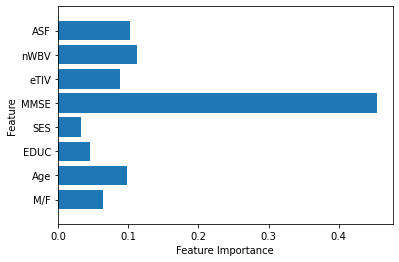

In [24]:
#Plot the importance of each feature for the algorithm
plot_feature_importances(SelectedRFModel_best)

Validation accuracy with best parameter is 0.7025089605734767
Best Test accuracy is 0.7659574468085106
Best max depth is 1
Best estimator is 8
Best learning rate is 0.2
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        53
         0.5       0.67      0.50      0.57        28
         1.0       0.90      0.69      0.78        13
         2.0       0.00      0.00      0.00         0

    accuracy                           0.77        94
   macro avg       0.59      0.53      0.55        94
weighted avg       0.77      0.77      0.76        94



C:\Users\rrolr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


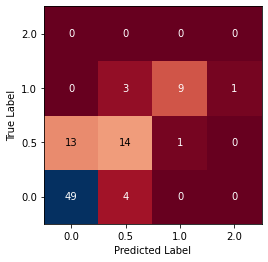

In [25]:
#Import necessary library
from sklearn.ensemble import GradientBoostingClassifier

#Initialize best_score variable
best_score = 0 

#Number of kfolds for the cross-validation
kfolds=3

#List of learning rates that are going to be tested
learning_rate=[0.001, 0.01, 0.1, 0.2, 0.3]

#Gradient Boosting algorithm where different maxdepth, features and estimator values are tested
for estimator in range(1,9):
    for learning in learning_rate:
        for maxdepth in range(1,9):
            
            tree = GradientBoostingClassifier(max_depth=maxdepth, n_estimators = estimator, learning_rate = learning, random_state=30)
            scores = cross_val_score(tree, X_train, Y_train, cv=kfolds, scoring='accuracy')
            score = np.mean(scores)
            SelectedGBCModel = GradientBoostingClassifier(max_depth=maxdepth, n_estimators = estimator, learning_rate = learning).fit(X_train, Y_train)  
            test_score = SelectedGBCModel.score(X_test, Y_test)
            
            #Check if the test score is better than current best score and variables update
            if test_score > best_score:
                best_score = test_score
                best_depth = maxdepth
                best_estimator = estimator
                best_learning_rate = learning
                best_valid = score
                PredictedOutputGBC = SelectedGBCModel.predict(X_test)
                SelectedGBCModel_best = GradientBoostingClassifier(max_depth=best_depth, n_estimators = best_estimator, learning_rate = best_learning_rate).fit(X_train, Y_train)  
            
print("Validation accuracy with best parameter is", best_valid)
print("Best Test accuracy is", best_score)
print("Best max depth is", best_depth)
print("Best estimator is", best_estimator)
print("Best learning rate is", best_learning_rate)

#Create and plot the confusion matrix
scores_images = mglearn.tools.heatmap(confusion_matrix(Y_test, PredictedOutputGBC), xlabel="Predicted Label",
                                      ylabel="True Label", xticklabels=["0.0", "0.5", "1.0","2.0"], 
                                       yticklabels=["0.0", "0.5", "1.0","2.0"], cmap="RdBu", fmt="%d")

#Print of results report
print(classification_report(Y_test, PredictedOutputGBC))

#Append the results to the list
model = 'Gradient Boosting'
results.append([model, best_valid, best_score])

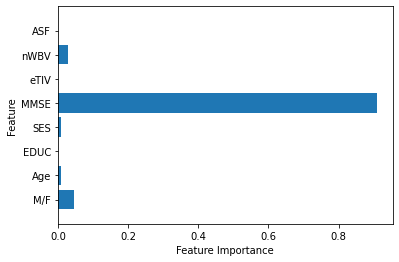

In [26]:
#Plot the importance of each feature for the algorithm
plot_feature_importances(SelectedGBCModel_best)

Validation accuracy with best parameter is 0.7096774193548386
Best Test accuracy is 0.723404255319149
Best alpha is 1
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        53
         0.5       0.53      0.64      0.58        28
         1.0       1.00      0.54      0.70        13

    accuracy                           0.72        94
   macro avg       0.78      0.66      0.70        94
weighted avg       0.75      0.72      0.73        94



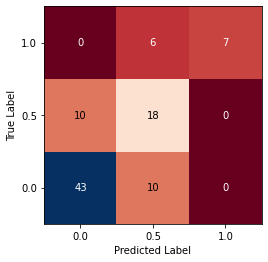

In [27]:
#Import necessary library
from sklearn.neural_network import MLPClassifier

#Initialize best_score variable
best_score = 0 

#Number of kfolds for the cross-validation
kfolds=3

#List of alpha factors that are going to be tested
alpha_factor = [0.0001, 0.01, 0.1, 1]

#Multilayer perceptron algorithm where different alpha factors are tested
for alpha in alpha_factor:
            nlp = MLPClassifier(solver='lbfgs', max_iter=10000, random_state=30, alpha=alpha, hidden_layer_sizes=[10,10])
            scores = cross_val_score(nlp, X_train_scaled, Y_train, cv=kfolds, scoring='accuracy')
            score = np.mean(scores)
            SelectedMLPModel = MLPClassifier(solver='lbfgs', max_iter=10000, random_state=30, alpha=alpha, hidden_layer_sizes=[10,10]).fit(X_train_scaled, Y_train)  
            test_score = SelectedMLPModel.score(X_test_scaled, Y_test)
            
            #Check if the test score is better than current best score and variables update
            if test_score > best_score:
                best_score = test_score
                best_alpha = alpha
                best_valid = score
                PredictedOutputMLP = SelectedMLPModel.predict(X_test_scaled)
                SelectedMLPModel_best = MLPClassifier(solver='lbfgs', max_iter=10000, random_state=30, alpha=alpha, hidden_layer_sizes=[10,10]).fit(X_train_scaled, Y_train)  
            
print("Validation accuracy with best parameter is", best_valid)
print("Best Test accuracy is", best_score)
print("Best alpha is", best_alpha)

#Create and plot the confusion matrix
scores_images = mglearn.tools.heatmap(confusion_matrix(Y_test, PredictedOutputMLP), xlabel="Predicted Label",
                                      ylabel="True Label", xticklabels=["0.0", "0.5", "1.0",], 
                                       yticklabels=["0.0", "0.5", "1.0"], cmap="RdBu", fmt="%d")

#Print of results report
print(classification_report(Y_test, PredictedOutputMLP))

#Append the results to the list
model = 'Multilayer perceptron'
results.append([model, best_valid, best_score])

Validation accuracy with best parameter is 0.6917562724014337
Best Test accuracy is 0.7872340425531915
Best c is 1
Best kernel is rbf
Best gamma is 1
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90        53
         0.5       0.75      0.75      0.75        28
         1.0       0.33      0.08      0.12        13

    accuracy                           0.79        94
   macro avg       0.64      0.60      0.59        94
weighted avg       0.73      0.79      0.75        94



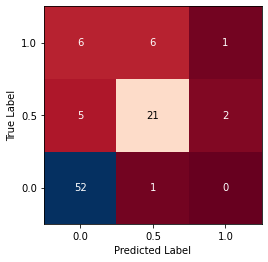

In [28]:
#Import necessary library
from sklearn.svm import SVC

#Initialize best_score variable
best_score = 0 

#Number of kfolds for the cross-validation
kfolds=3

#List of c and gamma factors and kernels that are going to be tested
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kernel = ['rbf', 'linear', 'poly', 'sigmoid']

#SVC algorithm where different c and gamma factors and kernels are tested
for c_param in c:
    for gamma_param in gamma:
        for kernel_param in kernel:
    
            svcmodel = SVC(kernel=kernel_param, C=c_param, gamma=gamma_param, random_state=30)
            scores = cross_val_score(svcmodel, X_train_scaled, Y_train, cv=kfolds, scoring='accuracy')
            score = np.mean(scores)
            SelectedSVCModel = SVC(kernel=kernel_param, C=c_param, gamma=gamma_param).fit(X_train_scaled, Y_train)  
            test_score = SelectedSVCModel.score(X_test_scaled, Y_test)
        
            #Check if the test score is better than current best score and variables update
            if test_score > best_score:
                best_score = test_score
                best_c = c_param
                best_kernel = kernel_param
                best_gamma = gamma_param
                best_valid = score
                PredictedOutputSVC = SelectedSVCModel.predict(X_test_scaled)
                SelectedSVCModel_best = SVC(kernel=best_kernel, C=best_c, gamma=best_gamma).fit(X_train_scaled, Y_train)  
            
print("Validation accuracy with best parameter is", best_valid)
print("Best Test accuracy is", best_score)
print("Best c is", best_c)
print("Best kernel is", best_kernel)
print("Best gamma is", best_gamma)

#Create and plot the confusion matrix
scores_images = mglearn.tools.heatmap(confusion_matrix(Y_test, PredictedOutputSVC), xlabel="Predicted Label",
                                      ylabel="True Label", xticklabels=["0.0", "0.5", "1.0"], 
                                       yticklabels=["0.0", "0.5", "1.0"], cmap="RdBu", fmt="%d")

#Print of results report
print(classification_report(Y_test, PredictedOutputSVC))

#Append the results to the list
model = 'SVC'
results.append([model, best_valid, best_score])

In [29]:
#Create a dataframe with all the accuracy results collected
result = pd.DataFrame(results, columns=['Model','Training Score', 'Accuracy'])

#Dataframe sorted by accuracy
result.sort_values('Accuracy', ascending=False)

,Model,Training Score,Accuracy
1,Random Forest,0.724014,0.797872
4,SVC,0.691756,0.787234
0,Decision Tree,0.724014,0.765957
2,Gradient Boosting,0.702509,0.765957
3,Multilayer perceptron,0.709677,0.723404
